<a href="https://colab.research.google.com/github/hanyuc37/U.S-Death-Causes/blob/main/U_S_Death_Causes_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [168]:
data_1 = pd.read_csv("/content/drive/MyDrive/US Death Cause/Death_Rates1900-2013.csv")
data_2 = pd.read_csv("/content/drive/MyDrive/US Death Cause/leading_cause_death.csv")

#Data_1

**Data Preprocessing**

In [169]:
# Checking for NAs
data_1.isna().sum()

Leading Causes             0
Year                       0
Age Adjusted Death Rate    0
dtype: int64

In [170]:
# Checking for duplicated values
data_1.duplicated().sum()

0

**The distribution of AADR.**

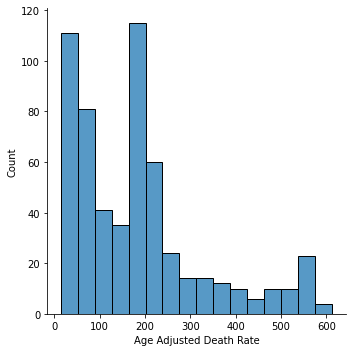

In [171]:
sns.displot(data_1['Age Adjusted Death Rate'])
plt.show()

**Leading Causes by Median AADR**

In [172]:
df_leading_cause = (pd.DataFrame(data_1.groupby("Leading Causes")['Age Adjusted Death Rate'].median())).reset_index()

Text(0.5, 1.0, 'Leading Causes by Median AADR')

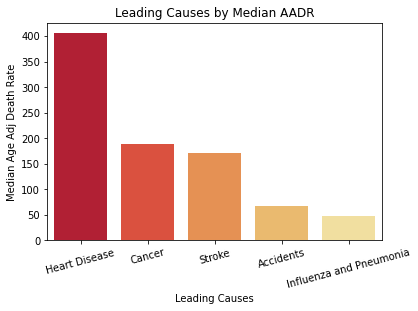

In [173]:
df_leading_cause = df_leading_cause.rename(columns = {'Age Adjusted Death Rate': 'Median Age Adj Death Rate'})
df_leading_cause = df_leading_cause.sort_values("Median Age Adj Death Rate", ascending = False)
g = sns.barplot(x = 'Leading Causes',
            y = 'Median Age Adj Death Rate', 
            data = df_leading_cause,
            palette ='YlOrRd_r'
            )
g.set_xticklabels(g.get_xticklabels(), rotation=15)
g.set_title('Leading Causes by Median AADR')

Heart Diseases has the highest median AADR.

**Leading Caused by ADDR Through out year of 1900 to 2013**

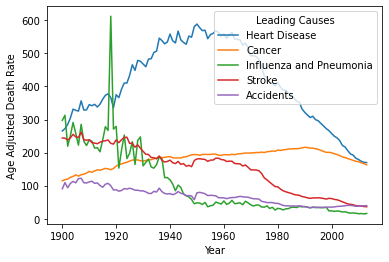

In [174]:
data_1 = data_1.sort_values('Year', ascending = True)
sns.lineplot( x = 'Year', 
             y = 'Age Adjusted Death Rate', 
             hue = 'Leading Causes', 
             data = data_1)

In [175]:
data_1.loc[data_1['Leading Causes'] == 'Influenza and Pneumonia']['Age Adjusted Death Rate'].max()
data_1.loc[data_1['Age Adjusted Death Rate']==612.4]

,Leading Causes,Year,Age Adjusted Death Rate
474,Influenza and Pneumonia,1918,612.4


The 1918 influenza pandemic was the most severe pandemic in recent history. It was caused by an H1N1 virus with genes of avian origin.

#Data_2


**Data Preprocessing**

In [176]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   YEAR            13260 non-null  int64 
 1   113_CAUSE_NAME  13260 non-null  object
 2   CAUSE_NAME      13260 non-null  object
 3   STATE           13260 non-null  object
 4   DEATHS          13260 non-null  object
 5   AADR            13260 non-null  object
dtypes: int64(1), object(5)
memory usage: 621.7+ KB


In [177]:
# Checking for NAs
data_2.isna().sum()

YEAR              0
113_CAUSE_NAME    0
CAUSE_NAME        0
STATE             0
DEATHS            0
AADR              0
dtype: int64

In [178]:
# Checking for duplicate values
data_2.duplicated().sum()

0

In [179]:
# both Deaths and AADR contains strings that not able to convert，change them to 0

data_2['DEATHS'] = pd.to_numeric(data_2['DEATHS'], errors='coerce').astype('Int64')
data_2['DEATHS'] = data_2['DEATHS'].fillna(0).astype('int')

data_2['AADR'] = pd.to_numeric(data_2['AADR'], errors='coerce').astype('float')
data_2['AADR'] = data_2['AADR'].fillna(0).astype('float')


In [180]:
data_2['STATE'].unique()
# Delete rows that the state "United Stated"
data_2 = data_2.loc[data_2['STATE'] != 'United States']

In [181]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13005 entries, 0 to 13259
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            13005 non-null  int64  
 1   113_CAUSE_NAME  13005 non-null  object 
 2   CAUSE_NAME      13005 non-null  object 
 3   STATE           13005 non-null  object 
 4   DEATHS          13005 non-null  int64  
 5   AADR            13005 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 711.2+ KB


**Linear Regression of `AADR` and `DEATHS` through out the year from 1990 to 2013**

In [182]:
df_dea_aadr = pd.DataFrame(data_2.groupby('YEAR').aggregate({'DEATHS':'sum', 'AADR':'mean'})).reset_index()

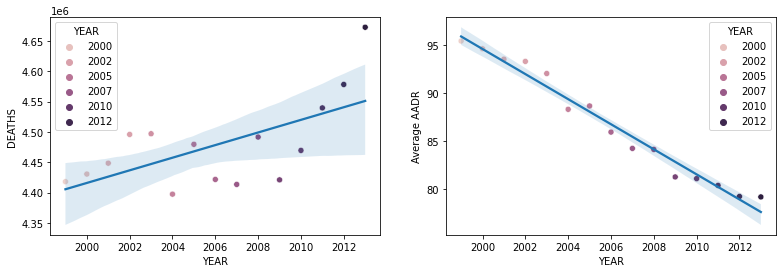

In [218]:
df_dea_aadr = df_dea_aadr.sort_values(['YEAR'],ascending = True)

fig = plt.figure()
fig.set_figwidth(13)
fig.set_figheight(4)

ax1 = fig.add_subplot(121)
ax1 = sns.scatterplot(x = 'YEAR', y = 'DEATHS', hue = 'YEAR',data = df_dea_aadr)
sns.regplot(data=df_dea_aadr, x="YEAR", y="DEATHS", scatter=False, ax=ax1, ci = 95)
ax2 = fig.add_subplot(122)
ax2 = sns.scatterplot(x = 'YEAR', y = 'AADR', hue = 'YEAR', data = df_dea_aadr)
sns.regplot(data=df_dea_aadr, x="YEAR", y="AADR", scatter=False, ax=ax2, ci = 95)
plt.ylabel('Average AADR')
plt.show()

The first plot shows that with the increasing in years, it is expected to have an increasing in death, however, that can results in population aging and population expanding. 

By looking at the regression of average AADR through out year, with the increasing in years, it is expected to have a lower average AADR, which may results in the improvement on medical technologies.

In [184]:
df_state = pd.DataFrame(data_2.groupby('STATE')['AADR'].mean()).reset_index()
df_state = df_state.rename(columns = {'AADR': 'AVG_AADR'})
df_state = df_state.sort_values('AVG_AADR', ascending = False).reset_index()
del df_state['index']

Top 10 highest average AADR states

In [185]:
print(df_state[:10])

                  STATE    AVG_AADR
0           Mississippi  108.216863
1               Alabama  104.068824
2         West Virginia  103.712392
3             Louisiana  103.011176
4              Kentucky  102.589647
5              Oklahoma  102.392157
6             Tennessee  100.561529
7              Arkansas   99.976941
8  District of Columbia   96.550000
9        South Carolina   95.790157


In [186]:
data_2.head()

,YEAR,113_CAUSE_NAME,CAUSE_NAME,STATE,DEATHS,AADR
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313,52.17
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294,55.91
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214,44.79
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287,47.56
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198,28.71


**Ranked Diseased by Average AADR**

In [187]:
df_cause = pd.DataFrame(data_2.groupby('CAUSE_NAME').aggregate({'AADR':'mean', 'DEATHS':'sum'})).reset_index()
df_cause = df_cause.rename(columns ={'AADR':'AVG_AADR', 'DEATHS':'TOTAL DEATHS'})
# Remove 'All Causes'
df_cause = df_cause[df_cause['CAUSE_NAME']!='All Causes']

In [188]:
df_cause = df_cause.sort_values('AVG_AADR', ascending = True)

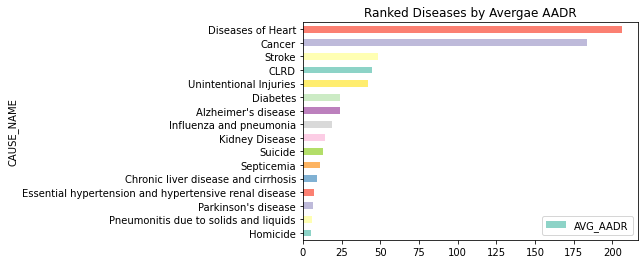

In [189]:
col_map = plt.get_cmap('Set3')
df_cause.plot.barh(x='CAUSE_NAME', y='AVG_AADR', title='Ranked Diseases by Avergae AADR', color=col_map.colors)
plt.show()

In [190]:
df_cause['PERCENTAGE'] = df_cause['TOTAL DEATHS'] / sum(df_cause['TOTAL DEATHS'])
df_cause = df_cause.sort_values('PERCENTAGE',ascending = False)

In [191]:
values = [x for x in df_cause['PERCENTAGE'][:5]]
values.append(sum(df_cause['PERCENTAGE'][5:]))
keys = [i for i in df_cause['CAUSE_NAME'][:5]]
keys.append('Others')

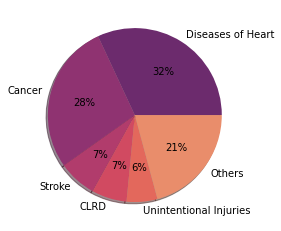

In [192]:
df_cause['PERCENTAGE']
colors = sns.color_palette('flare_r')
plt.pie(values, 
        labels=keys, 
        colors=colors,autopct='%.0f%%', 
        shadow=True)
plt.show()


Heart diseases and cancer are the two highest cause of death in the U.S, which accounted for 32% and 28% of death among all diseases included in the dataset
